In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [ ]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

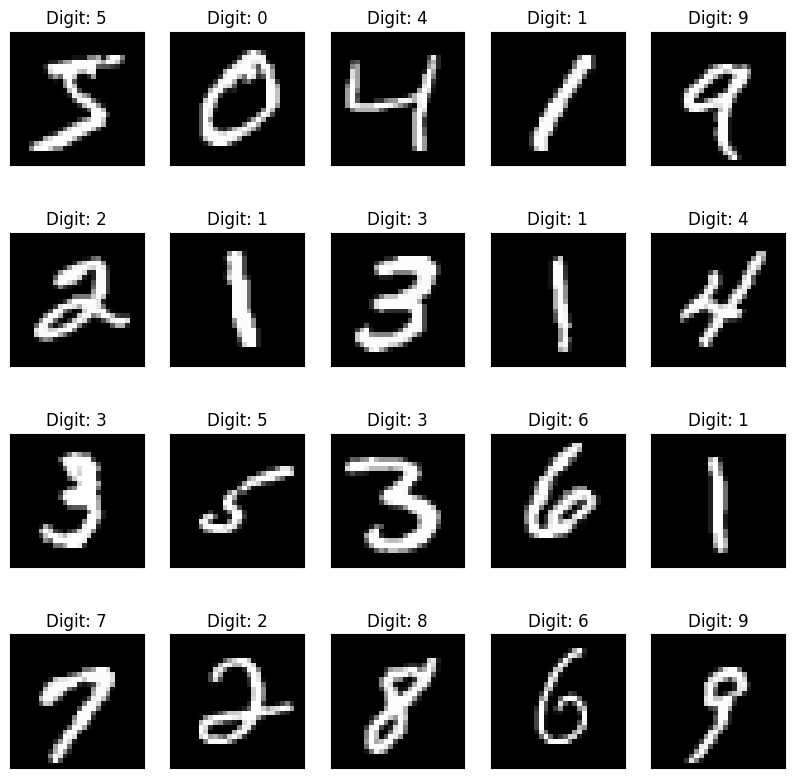

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(10, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [ ]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer= SGD(learning_rate=0.01, momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2328 - accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0758 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0356 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0252 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0191 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0073 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 32s 17m

1/1 [==============================] - 0s 24ms/step


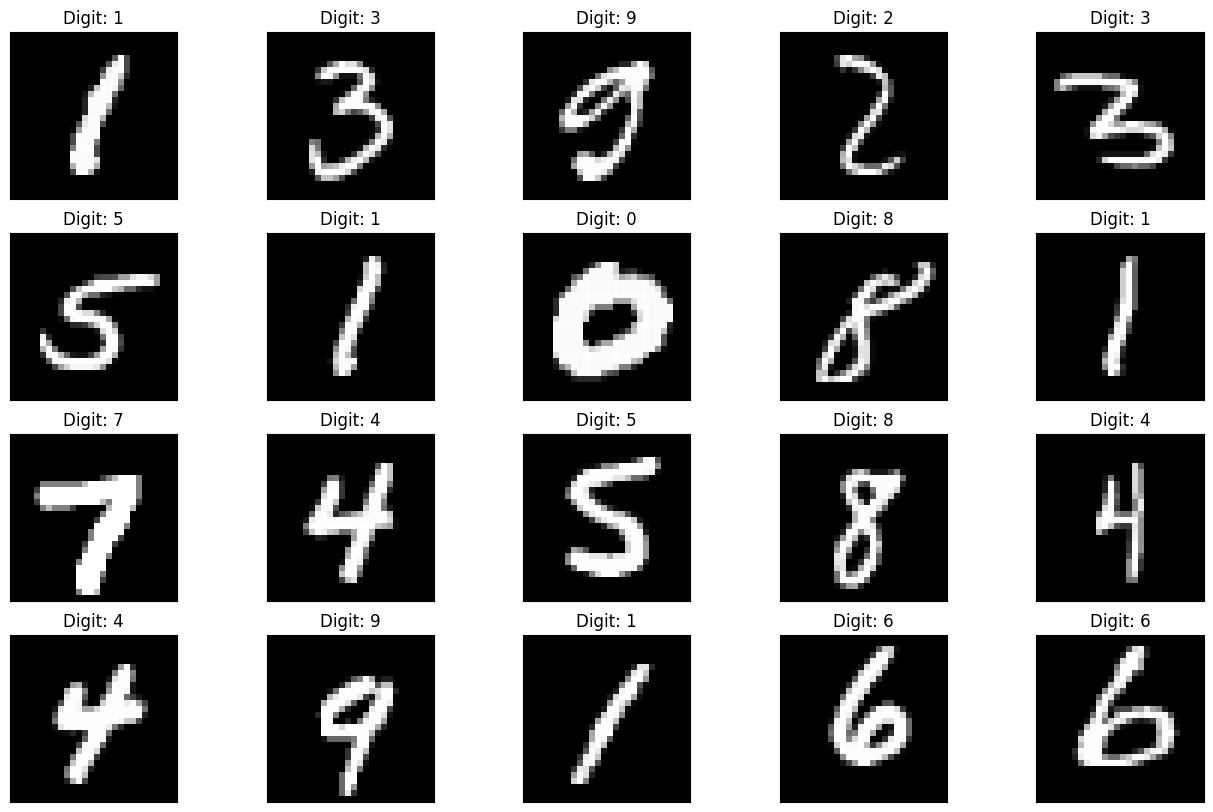

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 7ms/step


0.9867

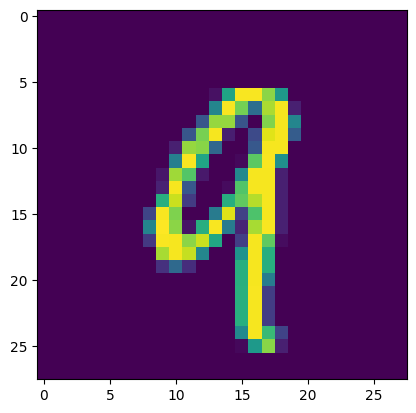

In [ ]:
n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [ ]:
predicted_value=model.predict(X_test)
print(np.argmax(predicted_value[n]))

313/313 [==============================] - 3s 11ms/step
Handwritten number in the image is= 9


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1])

Test loss: 0.04347667843103409
Test accuracy: 0.9866999983787537
